In [1]:
import torch

In [125]:
T = 10
V = 2

# log potentials
unary = torch.rand(T, V)
binary = torch.rand(T, V, V)

unary.fill_(1)

# psi^T_t (ignoring the timestep)
binary[:, 0, 0] = 1
binary[:, 1, 1] = 1
binary[:, 1, 0] = 0.1
binary[:, 0, 1] = 0.1

# Fix two values. 
unary[2][0] = 100
unary[8][1] = 100

In [126]:
# Forward
m_f = torch.Tensor(T, V) 
bel_f = torch.Tensor(T, V) 
bel_f[0] = 1 / 2.
for t in range(1, T):
    m_f[t] = torch.mm(binary[t], bel_f[t-1].unsqueeze(1))
    bel_f[t] = unary[t] * m_f[t]
    bel_f[t] = bel_f[t] / bel_f[t].sum()

In [127]:
# Backward
m_b = torch.Tensor(T, V) 
bel = torch.Tensor(T, V) 
bel[T-1] = 1 /2.
for t in range(T-2, -1, -1):
    m_b[t] = torch.mm(binary[t].transpose(0, 1), 
            (unary[t+1] * bel[t+1]).unsqueeze(1))
    bel[t] = m_b[t] * bel_f[t]
    bel[t] = bel[t] / bel[t].sum()


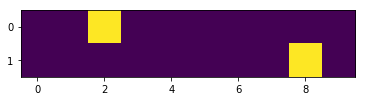

In [128]:
# Draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(unary.numpy().T)

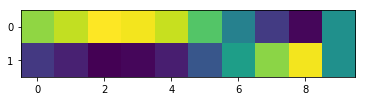

In [129]:
plt.imshow(bel.numpy().T)